# T-SNE Visualization for Amazon Fine Food Reviews with Polarity Based Color-Coding

In [1]:
%matplotlib inline

import sqlite3
import pandas as pd #for data frames
import numpy as np #numpy array operations
import nltk #natural lang processing, for processing text
import string
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
import pickle
import seaborn as sn

In [2]:
pickle_in=open("cleanedData.pickle","rb")
final = pickle.load(pickle_in)
all_positive_words = pickle.load(pickle_in)
all_negative_words = pickle.load(pickle_in)


In [3]:
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,b'witti littl book make son laugh loud recit c...
138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",b'grew read sendak book watch realli rosi movi...
138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,b'fun way children learn month year learn poem...
138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,positive,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...,b'great littl book read nice rhythm well good ...
138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,positive,1018396800,A great way to learn the months,This is a book of poetry about the months of t...,b'book poetri month year goe month cute littl ...


In [4]:
pickle_in = open("BOW_tfidf_avgW2V_TfidfW2V.pickle","rb")
count_vect = pickle.load(pickle_in) #BOW
final_counts = pickle.load(pickle_in) #BOW

tf_idf_vect = pickle.load(pickle_in) #TFIDF
final_tf_idf = pickle.load(pickle_in) #TFIDF
features = pickle.load(pickle_in) #TFIDF

w2v_model = pickle.load(pickle_in) #w2v
words = pickle.load(pickle_in) #w2v

sent_vectors = pickle.load(pickle_in) #avg W2V

C:\Users\Dell\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


# 1)Avg W2V T-SNE

In [5]:
print(len(sent_vectors))
print(len(sent_vectors[0]))

364171
50


Observation: 364171 reviews and 50 dimensions/unique features

In [6]:
pickleIn = open("listOfSentAfterCleaninhHTML_Punc.pickle","rb")
list_of_sent = pickle.load(pickleIn)

In [7]:
len(list_of_sent)

364171

In [8]:
type(sent_vectors)

list

In [9]:
import pandas as pd

In [10]:
sentence_vect_df = pd.DataFrame(sent_vectors)

In [11]:
sentence_vect_df.shape

(364171, 50)

In [12]:
sentence_vect_df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.132234,-0.364272,-0.824118,-0.306644,0.578700,-0.461712,0.688433,-0.290176,0.190121,-0.222507,...,-1.169374,-0.074575,0.138904,-0.459231,0.409991,0.008275,0.037868,0.477947,-0.107722,0.475282
1,0.634248,-1.090646,0.134773,-0.479418,0.825783,-0.520739,0.602169,-0.438830,0.087120,-0.396176,...,-1.076318,0.541288,0.227777,-0.317019,0.067416,-0.125908,0.058165,-0.472353,-0.325060,0.225436
2,-0.075600,-0.206586,-0.025804,-0.498216,1.097475,-0.432626,0.586218,-0.866296,-0.001912,-0.241171,...,-0.818745,-0.490779,0.207907,-0.523702,0.130281,0.201787,0.041148,-0.001624,-0.292683,0.595262
3,0.175865,-0.517111,-0.373042,-0.791520,1.030001,-0.333961,0.471097,-0.599948,0.107120,-0.341359,...,-0.818534,0.219210,0.312482,-0.401670,0.309404,-0.311354,0.275265,-0.067895,-0.719411,0.087224
4,0.437872,-0.358316,-0.442967,-0.805648,0.901151,0.058111,0.853637,-0.636608,0.121565,-0.918326,...,-0.842042,-0.198485,0.004800,-0.696316,0.364423,-0.097710,0.229285,0.488443,0.008654,0.406747


In [13]:
sentence_vect_df[0:1]

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.132234,-0.364272,-0.824118,-0.306644,0.5787,-0.461712,0.688433,-0.290176,0.190121,-0.222507,...,-1.169374,-0.074575,0.138904,-0.459231,0.409991,0.008275,0.037868,0.477947,-0.107722,0.475282


In [14]:
data = sentence_vect_df[0:10000]

In [15]:
data.shape

(10000, 50)

In [16]:
Scores = final['Score']
Scores.head()

138706    positive
138688    positive
138689    positive
138690    positive
138691    positive
Name: Score, dtype: object

In [17]:
Scores.shape

(364171,)

In [18]:
Scores = Scores.head(10000)
Scores.shape

(10000,)

In [19]:
# Data Preprocessing:Column Standardizing the data i.e making mean=0 and var=1

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
standardized_data.shape

(10000, 50)

### With 10k data points, Perplexity=30, iterations=1000 -> Default

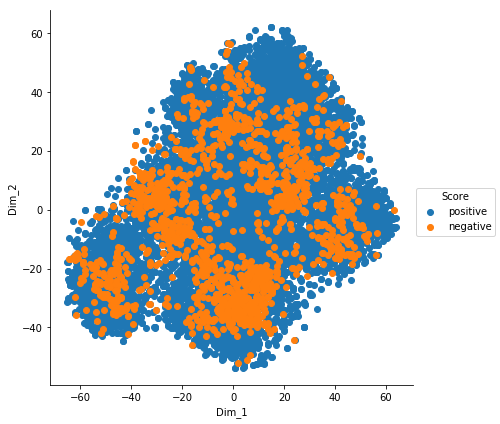

In [82]:

from sklearn.manifold import TSNE
import seaborn as sn

data_10000 = standardized_data[0:10000,:]
Scores_10000 =Scores

model = TSNE(n_components=2, random_state=0)

tsne_data = model.fit_transform(data_10000)

tsne_data = np.vstack((tsne_data.T, Scores_10000)).T

tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Score"))

sn.FacetGrid(tsne_df, hue="Score", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

### With 10k data points, Perplexity=10, iterations=1500

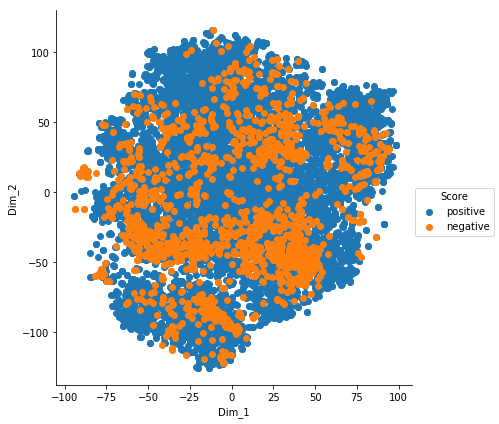

In [83]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0,perplexity=10,n_iter=1500)

tsne_data = model.fit_transform(standardized_data[0:10000])


tsne_data = np.vstack((tsne_data.T, final['Score'].head(10000))).T

tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Score"))


sn.FacetGrid(tsne_df, hue="Score", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

### With 10k data points, Perplexity=40, iterations=1500

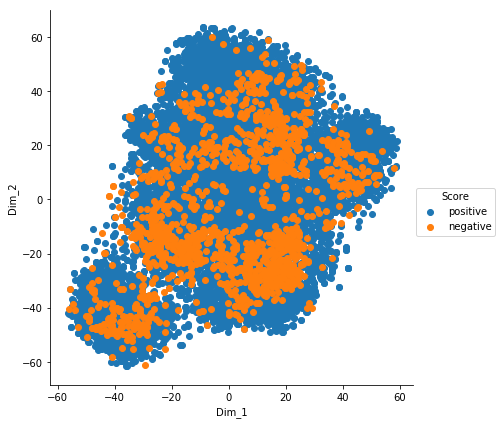

In [84]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0,perplexity=40,n_iter=1500)

tsne_data = model.fit_transform(standardized_data[0:10000])


tsne_data = np.vstack((tsne_data.T, final['Score'].head(10000))).T

tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Score"))


sn.FacetGrid(tsne_df, hue="Score", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

### With 10k data points, Perplexity=20, iterations=1500

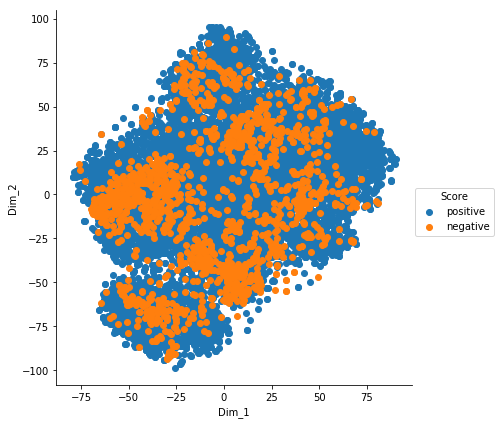

In [85]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0,perplexity=20,n_iter=1500)

tsne_data = model.fit_transform(standardized_data[0:10000])


tsne_data = np.vstack((tsne_data.T, final['Score'].head(10000))).T

tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Score"))


sn.FacetGrid(tsne_df, hue="Score", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

# 2)BOW T-SNE

In [19]:
print(type(count_vect)) 
print(type(final_counts))

<class 'sklearn.feature_extraction.text.CountVectorizer'>
<class 'scipy.sparse.csr.csr_matrix'>


In [20]:
final_counts.shape

(364171, 115281)

In [21]:
len(count_vect.get_feature_names())

115281

In [22]:
from scipy.sparse import csc_matrix

coo = final_counts.tocoo(copy=False)

In [23]:
'''pd.DataFrame({'index': coo.row, 'col': coo.col, 'data': coo.data}
                 )[['index', 'col', 'data']].sort_values(['index', 'col']
                 ).reset_index(drop=True)'''

"pd.DataFrame({'index': coo.row, 'col': coo.col, 'data': coo.data}\n                 )[['index', 'col', 'data']].sort_values(['index', 'col']\n                 ).reset_index(drop=True)"

In [24]:
bow_final = final_counts[0:1000].toarray()

In [25]:
type(bow_final)

numpy.ndarray

In [26]:
bow_df = pd.DataFrame(bow_final)

In [27]:
bow_df.shape

(1000, 115281)

In [145]:
standardized_data = StandardScaler().fit_transform(bow_df)
standardized_data.shape
type(standardized_data)

numpy.ndarray

### with perplexity = 10, iterations=250

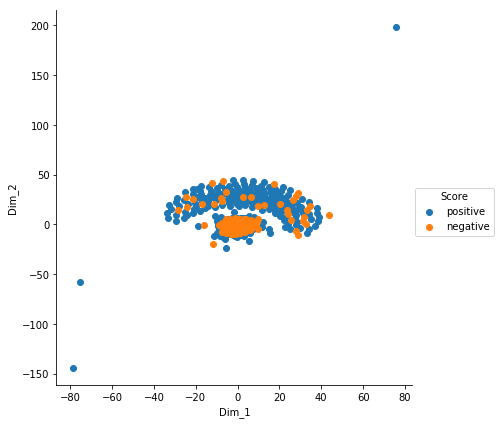

In [129]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0,perplexity=10,n_iter=250)

tsne_data = model.fit_transform(standardized_data)


tsne_data = np.vstack((tsne_data.T, final['Score'].head(1000))).T

tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Score"))


sn.FacetGrid(tsne_df, hue="Score", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

### with perplexity = 40, iterations=250

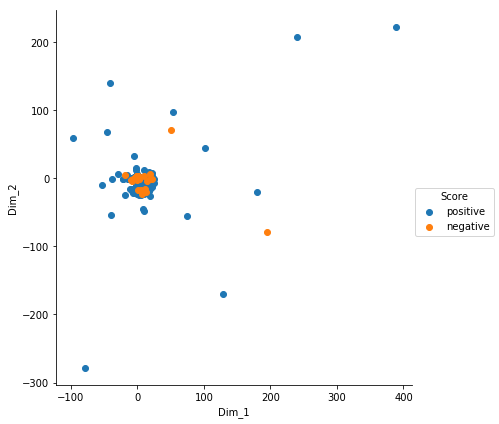

In [130]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0,perplexity=40,n_iter=250)

tsne_data = model.fit_transform(standardized_data)


tsne_data = np.vstack((tsne_data.T, final['Score'].head(1000))).T

tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Score"))


sn.FacetGrid(tsne_df, hue="Score", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

### with perplexity = 25, iterations=250

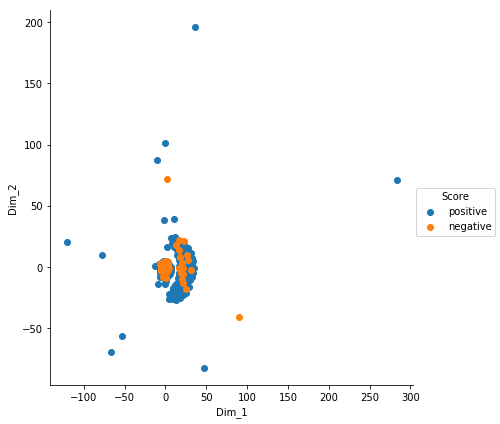

In [131]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0,perplexity=25,n_iter=250)

tsne_data = model.fit_transform(standardized_data)


tsne_data = np.vstack((tsne_data.T, final['Score'].head(1000))).T

tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Score"))


sn.FacetGrid(tsne_df, hue="Score", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

### with perplexity = 25, iterations=1000

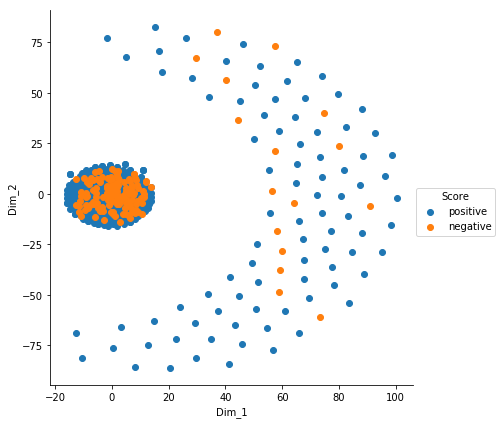

In [132]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0,perplexity=25,n_iter=1000)

tsne_data = model.fit_transform(standardized_data)


tsne_data = np.vstack((tsne_data.T, final['Score'].head(1000))).T

tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Score"))


sn.FacetGrid(tsne_df, hue="Score", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

### with perplexity = 30, iterations=1800

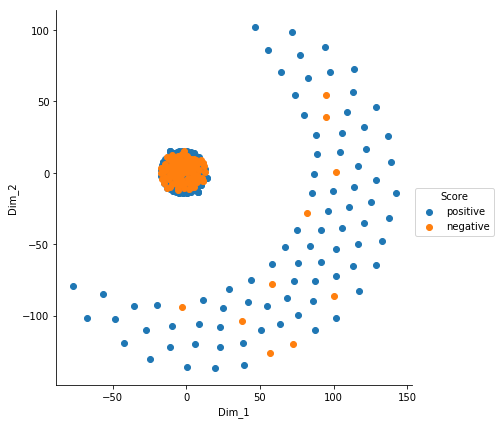

In [133]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0,perplexity=30,n_iter=1800)

tsne_data = model.fit_transform(standardized_data)


tsne_data = np.vstack((tsne_data.T, final['Score'].head(1000))).T

tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Score"))


sn.FacetGrid(tsne_df, hue="Score", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

### with perplexity = 20, iterations=2000

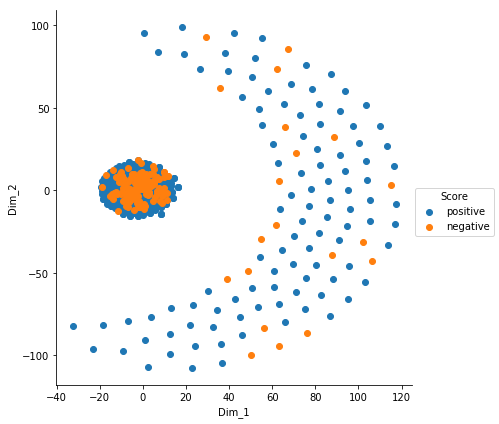

In [134]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0,perplexity=20,n_iter=2000)

tsne_data = model.fit_transform(standardized_data)


tsne_data = np.vstack((tsne_data.T, final['Score'].head(1000))).T

tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Score"))


sn.FacetGrid(tsne_df, hue="Score", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

# 3)TF-IDF T-SNE

In [19]:
type(final_tf_idf)

scipy.sparse.csr.csr_matrix

In [20]:
final_tf_idf.shape

(364171, 2910192)

In [21]:
tfidf_final = final_tf_idf[0:500].toarray()
len(tfidf_final)

500

In [22]:
tfidf_data = pd.DataFrame(tfidf_final)
tfidf_data.shape

(500, 2910192)

### with perplexity=20, iterations = 250, 500 data points

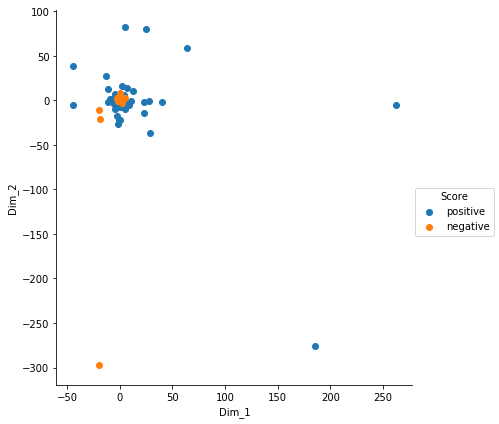

In [23]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0,perplexity=20,n_iter=250)

tsne_data = model.fit_transform(tfidf_data)


tsne_data = np.vstack((tsne_data.T, final['Score'].head(500))).T

tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Score"))


sn.FacetGrid(tsne_df, hue="Score", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

# 4)Weighted TF-IDF W2V -> T-SNE

In [20]:
pickle_in =open("WiightedTfidfW2V.pickle","rb")
tfidf_sent_vectors = pickle.load(pickle_in)

In [25]:
tfidf_w2v = pd.DataFrame(tfidf_sent_vectors)


In [26]:
tfidf_w2v.shape

(1000, 50)

In [28]:
standardized_data = StandardScaler().fit_transform(tfidf_w2v)
standardized_data.shape
type(standardized_data)

numpy.ndarray

### With perplexity=30

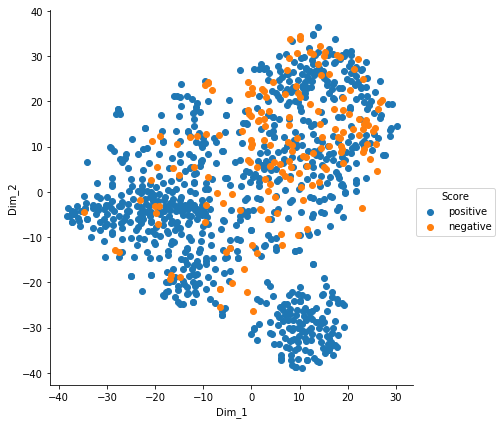

In [29]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0,perplexity=30,n_iter=2500)

tsne_data = model.fit_transform(standardized_data)


tsne_data = np.vstack((tsne_data.T, final['Score'].head(1000))).T

tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Score"))


sn.FacetGrid(tsne_df, hue="Score", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

### With Perplexity=20

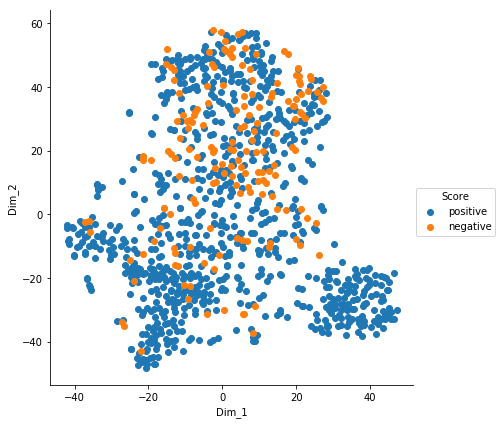

In [30]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0,perplexity=20,n_iter=2500)

tsne_data = model.fit_transform(standardized_data)


tsne_data = np.vstack((tsne_data.T, final['Score'].head(1000))).T

tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Score"))


sn.FacetGrid(tsne_df, hue="Score", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

### With perplexity=10

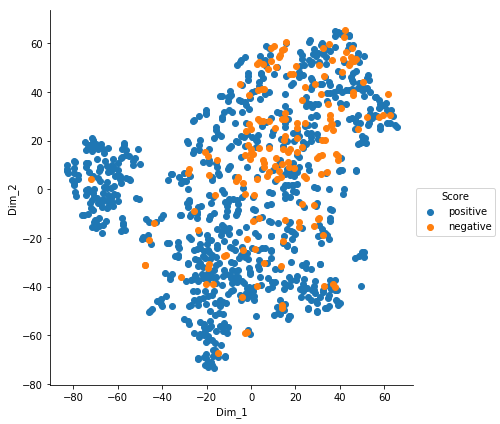

In [31]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0,perplexity=10,n_iter=2500)

tsne_data = model.fit_transform(standardized_data)


tsne_data = np.vstack((tsne_data.T, final['Score'].head(1000))).T

tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Score"))


sn.FacetGrid(tsne_df, hue="Score", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

### With Perplexity =40

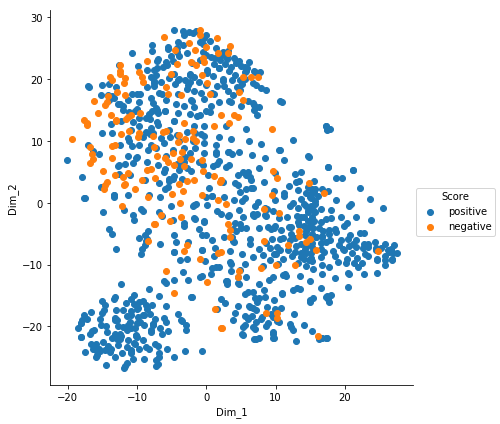

In [32]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0,perplexity=40,n_iter=2500)

tsne_data = model.fit_transform(standardized_data)


tsne_data = np.vstack((tsne_data.T, final['Score'].head(1000))).T

tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Score"))


sn.FacetGrid(tsne_df, hue="Score", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

### With Perplexity = 50

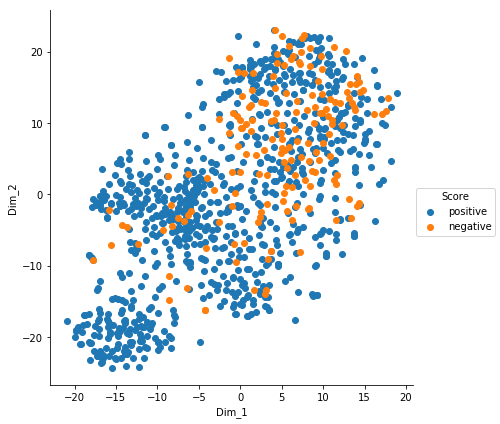

In [33]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0,perplexity=50,n_iter=2500)

tsne_data = model.fit_transform(standardized_data)


tsne_data = np.vstack((tsne_data.T, final['Score'].head(1000))).T

tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Score"))


sn.FacetGrid(tsne_df, hue="Score", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

# Summary:

In This Assignment we have plotted T-SNE for Bag of Words, Average Word2Vec, TF-IDF, Weighted TF-IDF W2V, In all these T-SNE plots we are unable to classify positve and negative reviews into clusters.

### Note:
In Every method I have Used subset of data as it is taking huge amount of time to execute on full data set.